In [1]:
!ls

In [174]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
sns.set()

In [186]:
bud_rev_df = pd.read_csv('movies_budget_revenue.csv')

In [187]:
bud_rev_df.head()

,Unnamed: 0,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,actors,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,13781,tt0065421,The AristoCats,The AristoCats,1970,1971-07-02,"Animation, Adventure, Comedy",78,USA,English,...,"Phil Harris, Eva Gabor, Sterling Holloway, Sca...","With the help of a smooth talking tomcat, a fa...",7.1,85509,4000000.0,35452658.0,35459543.0,66.0,125.0,109.0
1,13798,tt0065462,Beneath the Planet of the Apes,Beneath the Planet of the Apes,1970,1970-07-24,"Action, Adventure, Sci-Fi",95,USA,English,...,"James Franciscus, Kim Hunter, Maurice Evans, L...",The sole survivor of an interplanetary rescue ...,6.1,39595,3000000.0,18999718.0,18999718.0,46.0,168.0,64.0
2,13993,tt0065988,Little Big Man,Little Big Man,1970,1971-07-30,"Adventure, Comedy, Drama",139,USA,English,...,"Dustin Hoffman, Faye Dunaway, Chief Dan George...","Jack Crabb, looking back from extreme old age,...",7.6,31084,15000000.0,31559552.0,31559552.0,63.0,119.0,58.0
3,14003,tt0066011,Love Story,Love Story,1970,1971-04-16,"Drama, Romance",100,USA,English,...,"Ali MacGraw, Ryan O'Neal, John Marley, Ray Mil...",A boy and a girl from different backgrounds fa...,6.9,27788,2200000.0,106397186.0,106397186.0,84.0,167.0,50.0
4,14145,tt0066434,THX 1138,THX 1138,1971,1971-03-11,"Drama, Sci-Fi, Thriller",86,USA,English,...,"Robert Duvall, Donald Pleasence, Don Pedro Col...","In the twenty-fifth century, a time when peopl...",6.7,45363,777000.0,2437000.0,2437000.0,75.0,223.0,85.0


In [188]:
bud_rev_df.drop(columns = ['Unnamed: 0', 'country', 'language'], inplace =True)

In [189]:
bud_rev_df['genre'] = bud_rev_df.apply(lambda x: x['genre'].replace(' ','').split(','), axis = 1)

In [192]:
bud_rev_df.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worldwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0065421,The AristoCats,The AristoCats,1970,1971-07-02,"[Animation, Adventure, Comedy]",78,Wolfgang Reitherman,"Larry Clemmons, Vance Gerry",Walt Disney Productions,"Phil Harris, Eva Gabor, Sterling Holloway, Sca...","With the help of a smooth talking tomcat, a fa...",7.1,85509,4000000.0,35452658.0,35459543.0,66.0,125.0,109.0
1,tt0065462,Beneath the Planet of the Apes,Beneath the Planet of the Apes,1970,1970-07-24,"[Action, Adventure, Sci-Fi]",95,Ted Post,"Paul Dehn, Mort Abrahams",Twentieth Century Fox,"James Franciscus, Kim Hunter, Maurice Evans, L...",The sole survivor of an interplanetary rescue ...,6.1,39595,3000000.0,18999718.0,18999718.0,46.0,168.0,64.0
2,tt0065988,Little Big Man,Little Big Man,1970,1971-07-30,"[Adventure, Comedy, Drama]",139,Arthur Penn,"Thomas Berger, Calder Willingham",Cinema Center Films,"Dustin Hoffman, Faye Dunaway, Chief Dan George...","Jack Crabb, looking back from extreme old age,...",7.6,31084,15000000.0,31559552.0,31559552.0,63.0,119.0,58.0
3,tt0066011,Love Story,Love Story,1970,1971-04-16,"[Drama, Romance]",100,Arthur Hiller,Erich Segal,Paramount Pictures,"Ali MacGraw, Ryan O'Neal, John Marley, Ray Mil...",A boy and a girl from different backgrounds fa...,6.9,27788,2200000.0,106397186.0,106397186.0,84.0,167.0,50.0
4,tt0066434,THX 1138,THX 1138,1971,1971-03-11,"[Drama, Sci-Fi, Thriller]",86,George Lucas,"George Lucas, George Lucas",American Zoetrope,"Robert Duvall, Donald Pleasence, Don Pedro Col...","In the twenty-fifth century, a time when peopl...",6.7,45363,777000.0,2437000.0,2437000.0,75.0,223.0,85.0


In [193]:
genres_gross = {}
def fgenre_gross(row):
    for i in row['genre']:
        if i in genres_gross:
            genres_gross[i] += row['worldwide_gross_income']
        else:
            genres_gross[i] = row['worldwide_gross_income']
bud_rev_df.apply(fgenre_gross, axis = 1);

In [194]:
genres_gross

{'Animation': 36197424620.0,
 'Adventure': 84811927501.0,
 'Comedy': 87987631569.0,
 'Action': 64979012559.0,
 'Sci-Fi': 30082374032.0,
 'Drama': 59786756655.0,
 'Romance': 28285029639.0,
 'Thriller': 21199794981.0,
 'Crime': 18425669816.0,
 'Mystery': 10993886229.0,
 'Western': 785732476.0,
 'Family': 20405127910.0,
 'Horror': 11259931024.0,
 'Biography': 6318184739.0,
 'War': 287564517.0,
 'Music': 4908000187.0,
 'Sport': 3458151992.0,
 'Musical': 2770282086.0,
 'Fantasy': 23190946983.0,
 'History': 1924352043.0}

In [195]:
cum_gross_df = pd.DataFrame.from_dict(genres_gross, orient='index', columns = ['cummulative_gross'])

In [196]:
cum_gross_df.sort_values(by = 'cummulative_gross', inplace = True)

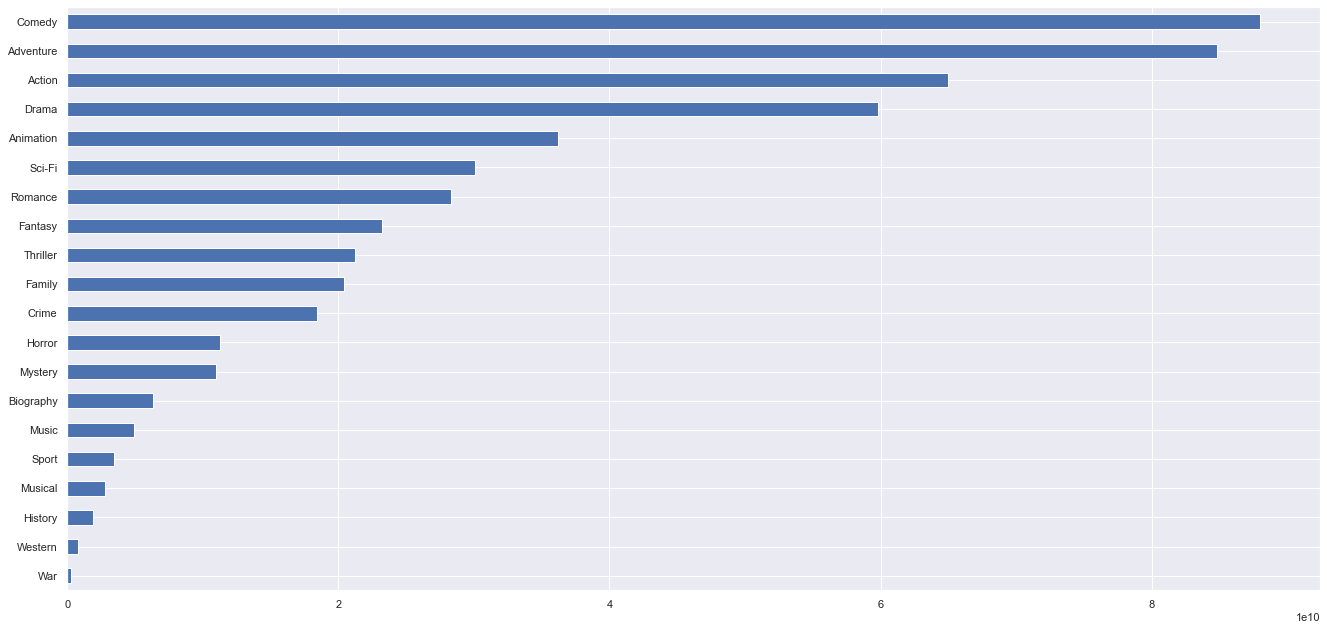

In [197]:
cum_gross_df.plot(kind='barh', figsize=(20,10), legend = False)

In [198]:
genres_count = {}
def fgenre_count(row):
    for i in row['genre']:
        if i in genres_count:
            genres_count[i] += 1
        else:
            genres_count[i] = 1
df.apply(lambda x: fgenre_count(x), axis = 1);

In [199]:
genres_count

{'Animation': 118,
 'Adventure': 334,
 'Comedy': 1184,
 'Action': 413,
 'Sci-Fi': 164,
 'Drama': 1309,
 'Romance': 485,
 'Thriller': 341,
 'Crime': 409,
 'Mystery': 190,
 'Western': 15,
 'Family': 174,
 'Horror': 269,
 'Biography': 132,
 'War': 14,
 'Music': 108,
 'Sport': 84,
 'Musical': 27,
 'Fantasy': 177,
 'History': 37}

In [200]:
genres_count_df = pd.DataFrame.from_dict(genres_count, orient = 'index', columns = ['quantity'])

In [201]:
genres_count_df.sort_values(by = 'quantity', inplace = True)

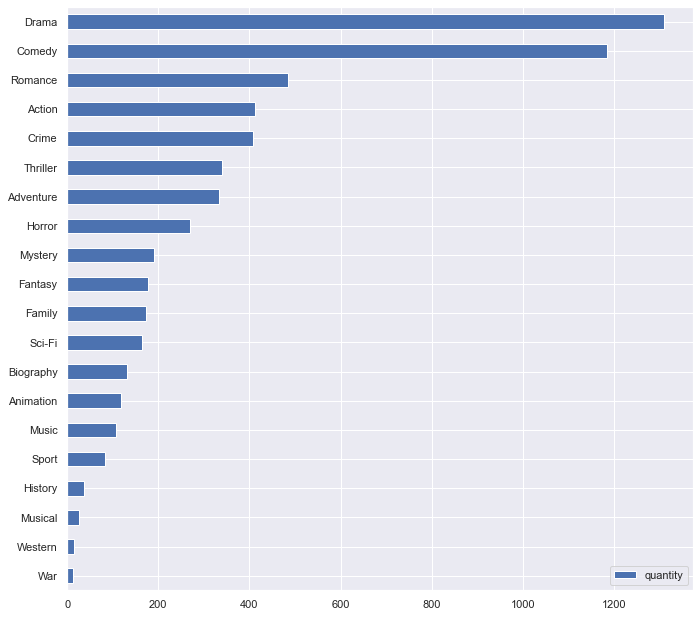

In [202]:
genres_count_df.plot(kind= 'barh', figsize = (10,10))

In [203]:
genres_bud = {}
def fgenre_bud(row):
    for i in row['genre']:
        if i in genres_bud:
            genres_bud[i] += row['budget']
        else:
            genres_bud[i] = row['budget']
df.apply(fgenre_bud, axis = 1);

In [204]:
genres_bud

{'Animation': 10467220000.0,
 'Adventure': 23818850000.0,
 'Comedy': 31155152190.0,
 'Action': 21356857421.0,
 'Sci-Fi': 8621472421.0,
 'Drama': 24540608769.0,
 'Romance': 9440113000.0,
 'Thriller': 7832372020.0,
 'Crime': 8833626000.0,
 'Mystery': 4254515000.0,
 'Western': 252250000.0,
 'Family': 7190504000.0,
 'Horror': 3736975020.0,
 'Biography': 2760941000.0,
 'War': 155900000.0,
 'Music': 1763900000.0,
 'Sport': 1889210000.0,
 'Musical': 764100000.0,
 'Fantasy': 7076018000.0,
 'History': 1089000000.0}

In [211]:
cum_budget_df = pd.DataFrame.from_dict(genres_bud, orient = 'index', columns = ['cummulative_budget'])

In [214]:
bud_rev_by_genre_df = genres_count_df.merge(cum_budget_df, how = 'left', left_index = True, right_index = True)
bud_rev_by_genre_df = bud_rev_by_genre_df.merge(cum_gross_df, how = 'left', left_index = True, right_index = True)

In [215]:
bud_rev_by_genre_df

,quantity,cummulative_budget,cummulative_gross
War,14,1.559000e+08,2.875645e+08
Western,15,2.522500e+08,7.857325e+08
Musical,27,7.641000e+08,2.770282e+09
History,37,1.089000e+09,1.924352e+09
Sport,84,1.889210e+09,3.458152e+09
Music,108,1.763900e+09,4.908000e+09
Animation,118,1.046722e+10,3.619742e+10
Biography,132,2.760941e+09,6.318185e+09
Sci-Fi,164,8.621472e+09,3.008237e+10
Family,174,7.190504e+09,2.040513e+10


In [217]:
bud_rev_by_genre_df['avg_budget'] = bud_rev_by_genre_df['cummulative_budget'] / bud_rev_by_genre_df['quantity']
bud_rev_by_genre_df['avg_gross'] = bud_rev_by_genre_df['cummulative_gross'] / bud_rev_by_genre_df['quantity']
bud_rev_by_genre_df['avg_roi'] = bud_rev_by_genre_df['avg_gross'] / bud_rev_by_genre_df['avg_budget']
bud_rev_by_genre_df

,quantity,cummulative_budget,cummulative_gross,avg_budget,avg_gross,avg_roi
War,14,1.559000e+08,2.875645e+08,1.113571e+07,2.054032e+07,1.844545
Western,15,2.522500e+08,7.857325e+08,1.681667e+07,5.238217e+07,3.114896
Musical,27,7.641000e+08,2.770282e+09,2.830000e+07,1.026030e+08,3.625549
History,37,1.089000e+09,1.924352e+09,2.943243e+07,5.200951e+07,1.767082
Sport,84,1.889210e+09,3.458152e+09,2.249060e+07,4.116848e+07,1.830475
Music,108,1.763900e+09,4.908000e+09,1.633241e+07,4.544445e+07,2.782471
Animation,118,1.046722e+10,3.619742e+10,8.870525e+07,3.067578e+08,3.458170
Biography,132,2.760941e+09,6.318185e+09,2.091622e+07,4.786504e+07,2.288417
Sci-Fi,164,8.621472e+09,3.008237e+10,5.256995e+07,1.834291e+08,3.489239
Family,174,7.190504e+09,2.040513e+10,4.132474e+07,1.172709e+08,2.837788


In [219]:
bud_rev_by_genre_df = bud_rev_by_genre_df.query("index == 'Animation' | quantity > 150")

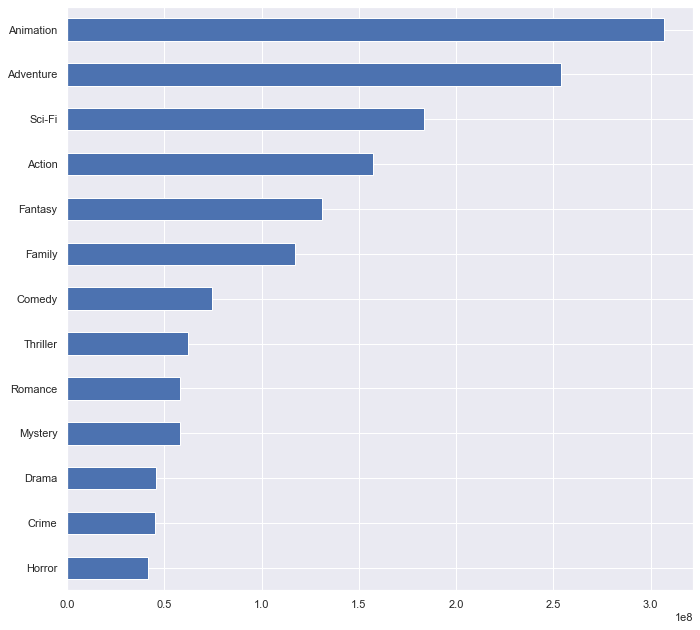

In [220]:
bud_rev_by_genre_df['avg_gross'].sort_values().plot(kind = 'barh', figsize = (10,10))

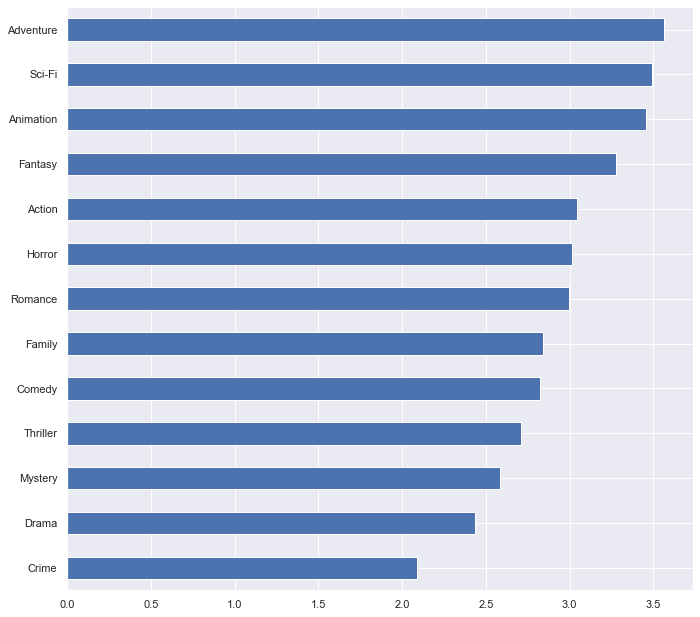

In [221]:
bud_rev_by_genre_df['avg_roi'].sort_values().plot(kind = 'barh', figsize = (10,10))

In [222]:
movies_and_ratings_df = pd.read_csv('movies_and_ratings.csv')

In [223]:
movies_and_ratings_df.head()

,Unnamed: 0,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1
0,0,tt0054724,Zombie,Zombie,1971,1971-10-29,Horror,92,USA,English,...,56,14,33,37,80,112,154,225,253,188
1,1,tt0060951,A Scream in the Streets,A Scream in the Streets,1973,1973-11-01,"Action, Crime",96,USA,English,...,11,4,11,28,30,39,30,34,18,17
2,2,tt0061592,Doomsday Machine,Doomsday Machine,1972,1972,Sci-Fi,83,USA,English,...,28,1,9,18,29,68,72,145,228,284
3,3,tt0062730,The Big Snatch,The Big Snatch,1971,1971,"Crime, Drama",77,USA,English,...,14,7,18,13,16,16,15,16,10,10
4,4,tt0062980,Fleshpot on 42nd Street,Fleshpot on 42nd Street,1973,1973-01-10,Drama,87,USA,English,...,26,16,27,27,22,18,13,5,7,14


In [224]:
movies_and_ratings_df['genre'] = movies_and_ratings_df.apply(lambda x: x['genre'].replace(' ','').split(','), axis = 1)

In [225]:
movies_and_ratings_df.head()

,Unnamed: 0,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,...,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1
0,0,tt0054724,Zombie,Zombie,1971,1971-10-29,[Horror],92,USA,English,...,56,14,33,37,80,112,154,225,253,188
1,1,tt0060951,A Scream in the Streets,A Scream in the Streets,1973,1973-11-01,"[Action, Crime]",96,USA,English,...,11,4,11,28,30,39,30,34,18,17
2,2,tt0061592,Doomsday Machine,Doomsday Machine,1972,1972,[Sci-Fi],83,USA,English,...,28,1,9,18,29,68,72,145,228,284
3,3,tt0062730,The Big Snatch,The Big Snatch,1971,1971,"[Crime, Drama]",77,USA,English,...,14,7,18,13,16,16,15,16,10,10
4,4,tt0062980,Fleshpot on 42nd Street,Fleshpot on 42nd Street,1973,1973-01-10,[Drama],87,USA,English,...,26,16,27,27,22,18,13,5,7,14


In [226]:
movies_and_ratings_df.columns

Index(['Unnamed: 0', 'imdb_title_id', 'title', 'original_title', 'year',
       'date_published', 'genre', 'duration', 'country', 'language',
       'director', 'writer', 'production_company', 'actors', 'description',
       'avg_vote', 'votes', 'reviews_from_users', 'reviews_from_critics',
       'weighted_average_vote', 'total_votes', 'mean_vote', 'median_vote',
       'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6', 'votes_5',
       'votes_4', 'votes_3', 'votes_2', 'votes_1'],
      dtype='object')

In [227]:
imdb_id = []
year = []
genre = []
rating = []
def genre_count_plus(row):
    for i in row['genre']:
        genre.append(i)
        year.append(row['year'])
        imdb_id.append(row['imdb_title_id'])
        rating.append(row['weighted_average_vote'])
movies_and_ratings_df.apply(genre_count_plus, axis = 1);
mov_rat_w_genre = {'imdb_title_id':imdb_id, 'year':year, 'rating':rating, 'genre':genre}

In [228]:
mov_rat_w_genre_df = pd.DataFrame.from_dict(mov_rat_w_genre)

In [229]:
mov_rat_w_genre_df.head()

,imdb_title_id,year,rating,genre
0,tt0054724,1971,3.4,Horror
1,tt0060951,1973,4.7,Action
2,tt0060951,1973,4.7,Crime
3,tt0061592,1972,2.4,Sci-Fi
4,tt0062730,1971,5.1,Crime


In [230]:
bins = [1969,1979,1989,1999,2009,2019]
groups = mov_rat_w_genre_df.groupby(by =['genre', pd.cut(mov_rat_w_genre_df.year, bins)])

In [231]:
movie_genre_by_year_df = groups.size().unstack(level = 0)

In [232]:
movie_genre_by_year_df['total'] = movie_genre_by_year_df.sum(axis = 0)

In [233]:
movie_genre_by_year_df

genre,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,Game-Show,...,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,total
year,,,,,,,,,,,,,,,,,,,,,
"(1969, 1979]",263,129,20,39,454,285,694,72,49,0,...,21,82,0,139,114,34,201,9,94,NaN
"(1979, 1989]",364,159,24,39,845,317,758,52,113,0,...,30,110,0,254,218,41,316,22,15,NaN
"(1989, 1999]",603,218,37,45,1171,504,1393,193,156,0,...,9,165,0,439,252,58,601,14,25,NaN
"(1999, 2009]",488,265,95,68,1576,448,1942,189,174,0,...,38,271,0,680,216,89,726,19,43,NaN
"(2009, 2019]",886,456,132,156,2050,643,3007,351,292,1,...,68,514,1,762,504,93,1579,50,69,NaN


In [234]:
col_sum = movie_genre_by_year_df.apply(lambda x: x.sum(), axis = 0)

In [235]:
keep = list(col_sum.sort_values().tail(10).index)
keep.insert(0,'Animation') #want to keep animation because it's unique in all though there is a small amount of animated movies the generate a lot of revenue
keep

['Animation',
 'Mystery',
 'Adventure',
 'Sci-Fi',
 'Crime',
 'Romance',
 'Action',
 'Thriller',
 'Horror',
 'Comedy',
 'Drama']

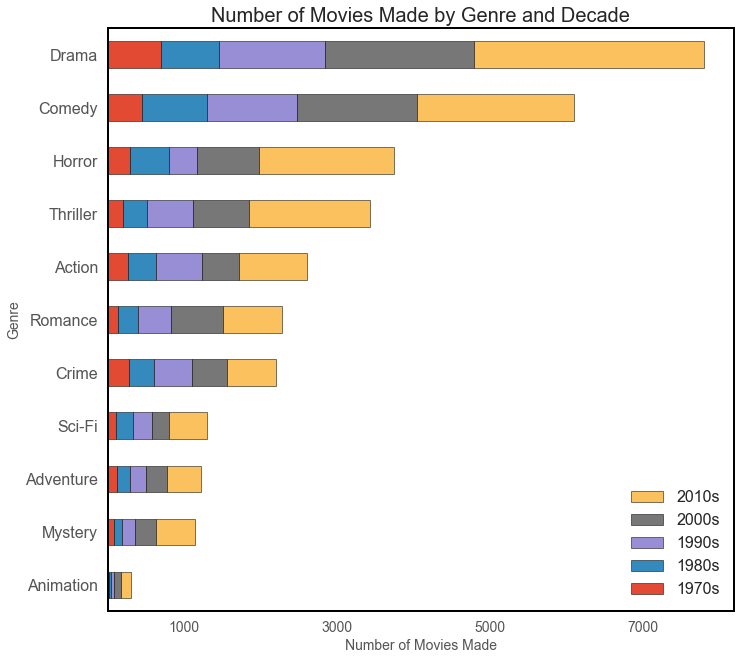

In [236]:
style.use('ggplot')
ax = movie_genre_by_year_df[keep].T.plot(kind='barh', stacked=True, figsize = (10,10), edgecolor = 'black')
ax.set_title('Number of Movies Made by Genre and Decade', fontsize = 20)
ax.set_xlabel('Number of Movies Made', fontsize = 14)
ax.set_ylabel('Genre', fontsize = 14)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles),['2010s', '2000s', '1990s', '1980s', '1970s'], prop={'size': 16},
          title_fontsize = 'xx-large', facecolor = 'white', edgecolor = 'white')
ax.grid(False)
ax.set_facecolor('white')
ax.set_xticks([1000,3000,5000,7000])
ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=16)
for i in ['left','right', 'top', 'bottom']:
    ax.spines[i].set_color('black')
    ax.spines[i].set_linewidth(2)